In [10]:
%load_ext autoreload
%autoreload 2

from copy import deepcopy
import os
import numpy as np
import pandas as pd
import activity_classifier as ac
from activity_classifier import sigproc
from scipy import signal
import matplotlib.pyplot as plt
plt.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
df = ac.load_acc_data_file()

/Users/bryanfry/code/activity-classifier/activity_classifier/__init__.py:171: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fp, compression=compression)


In [22]:
df.time

0          2016-11-13 02:18:00.000
1          2016-11-13 02:18:00.010
2          2016-11-13 02:18:00.020
3          2016-11-13 02:18:00.030
4          2016-11-13 02:18:00.040
                     ...          
10019996   2016-11-14 06:07:59.960
10019997   2016-11-14 06:07:59.970
10019998   2016-11-14 06:07:59.980
10019999   2016-11-14 06:07:59.990
10020000   2016-11-14 06:08:00.000
Name: time, Length: 10020001, dtype: datetime64[ns]

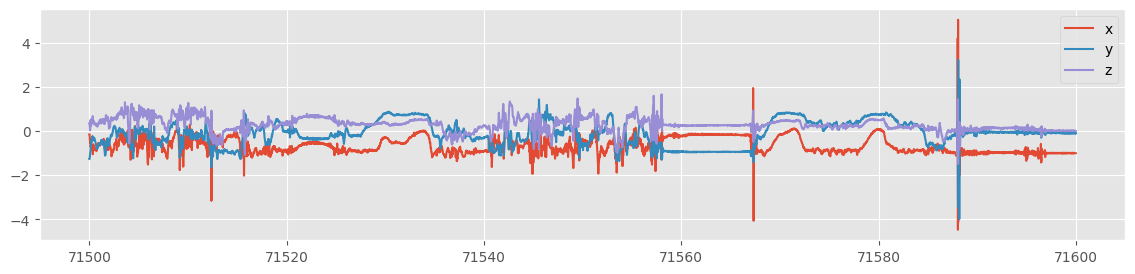

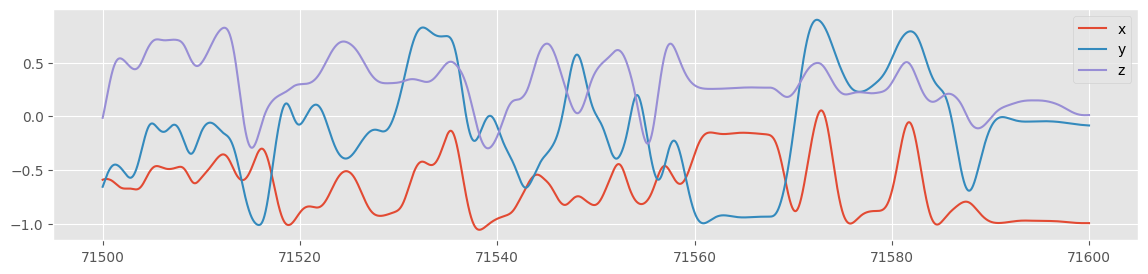

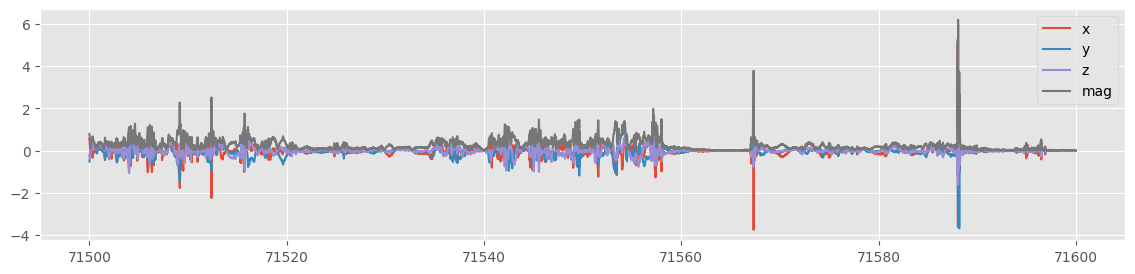

(<Figure size 1400x300 with 1 Axes>, <Axes: >)

In [20]:
FS = 100. # Sample rate (Hz)

hp_filter = sigproc.SmartIIRFilter(
    filter_func=signal.butter,
    btype='highpass',
    order=4,
    cutoff=0.25,
    fs=FS
)

lp_filter = sigproc.SmartIIRFilter(
    filter_func=signal.butter,
    btype='lowpass',
    order=4,
    cutoff=0.25,
    fs=FS
)

cts = ac.df_to_chunkable_ts(df, value_cols=['x', 'y', 'z'])
cts_lp = cts.apply_smart_filter(lp_filter, inplace=False)
cts_hp = cts.apply_smart_filter(hp_filter, inplace=False)
cts_hp.calc_vector_magnitude(inplace=True)

chunks = cts.get_chunks_by_time(chunk_duration=100)
chunks_lp = cts_lp.get_chunks_by_time(chunk_duration=100)
chunks_hp = cts_hp.get_chunks_by_time(chunk_duration=100)


#idx = np.random.randint(0, len(chunks))
idx = 715
chunks[idx].plot()
chunks_lp[idx].plot()
chunks_hp[idx].plot()


In [ ]:
def get_feature_vector(chunk_lp, chunk_hp, fd):
    

/var/folders/vn/wd57c8xd3s7cg4r144jfgkv80000gn/T/ipykernel_48252/31994183.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(ns)
/var/folders/vn/wd57c8xd3s7cg4r144jfgkv80000gn/T/ipykernel_48252/31994183.py:2: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  pd.value_counts(ns)


10000    1002
Name: count, dtype: int64

In [ ]:
'''
hp
    min x/y/x/mag
    max x/y/x/mag
    std x/y/x/mag

    mean_abs_deriv x/y/x/mag
    max_abs_deriv x/y/x/mag
    min_abs_deriv x/y/x/mag
    std_abs_deriv x/y/x/mag
    max_deriv x/y/x/mag
    min_deriv x/y/x/mag
    
    dominant_freq x/y/x/mag
    autocorrelation mag
    spectral_entropy mag
    cov_zero_crossing mag

    mag_norm_cross_corr_xy
    mag_norm_cross_corr_xz
    mag_norm_cross_corr_yz
    
    ratio_mean_abs_deriv_xy
    ratio_mean_abs_deriv_xz
    ratio_mean_abs_deriv_yz

    relative_phase_xy
    relative_phase_xz
    relative_phase_yz
    

lp
    mean x/y/x/mag
    min x/y/x/mag
    max x/y/x/mag
    std x/y/x/mag

    